# Exercise Nine: Numbers

This week, you'll be exploring the [GSS](https://gssdataexplorer.norc.org/) dataset we worked within in the "Social Stats" exercise. Using our demo and the textbook as a guide, pick three new variables to explore. Your workflow should:

- Import the current version of the file (available for download at the link above), and isolate the columns of interest based on the variables you want to include
- Using the variable navigator provided by GSS, determine the years applicable and narrow your dataset accordingly.
- Visualize at least two quantiative relationships or patterns: these might include connections between clear numerical values, such as age and income, or more complex visualizations based on boolean data (for example, our "yes" and "no" to reading fiction.)
- Group the data using at least two different divisions to spot interesting trends, and plot at least one variance across a group (refer to our example of happiness among fiction readers as a starting point.)

For a bonus challenge, try running another analysis using an advanced method such as summary statistics or cross tabulation.

## Imports and Narrows by Column and Year

In [1]:
import pandas as pd

# we restrict this (very large) dataset to the variables of interest
columns = ['id', 'year', 'age', 'sex', 'race', 'degree', 'prfmnce','artexbt']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

# further limit dataset to the years we are interested in
df = df.loc[df['year'].isin({2016})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race       degree prfmnce artexbt
59599     1  2016  47.0    male  white     bachelor     NaN     NaN
59600     2  2016  61.0    male  white  HIGH SCHOOL     NaN     NaN
59601     3  2016  72.0    male  white     bachelor     Yes      No
59602     4  2016  43.0  female  white  HIGH SCHOOL     NaN     NaN
59603     5  2016  55.0  female  white     graduate      No     Yes
...     ...   ...   ...     ...    ...          ...     ...     ...
62461  2863  2016  57.0  female  white     graduate     NaN     NaN
62462  2864  2016  77.0    male  white  HIGH SCHOOL     NaN     NaN
62463  2865  2016  87.0  female  white  HIGH SCHOOL      No      No
62464  2866  2016  55.0  female  white  HIGH SCHOOL     NaN     NaN
62465  2867  2016  72.0    male  white     bachelor      No     Yes

[2867 rows x 8 columns]>


In [2]:
# limit dataset to exclude records from individuals who didn't answer this survey
df = df.loc[df['prfmnce'].notna()]

#remove people with no value for age
df = df.loc[df['age'].notna()]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex   race          degree prfmnce artexbt
59601     3  2016  72.0    male  white        bachelor     Yes      No
59603     5  2016  55.0  female  white        graduate      No     Yes
59606     8  2016  23.0  female  other     HIGH SCHOOL      No      No
59608    10  2016  71.0    male  white  JUNIOR COLLEGE     Yes      No
59609    11  2016  33.0  female  black     HIGH SCHOOL      No      No
...     ...   ...   ...     ...    ...             ...     ...     ...
62456  2858  2016  41.0  female  white     HIGH SCHOOL      No      No
62458  2860  2016  57.0    male  white     HIGH SCHOOL      No      No
62460  2862  2016  75.0  female  white     HIGH SCHOOL     Yes      No
62463  2865  2016  87.0  female  white     HIGH SCHOOL      No      No
62465  2867  2016  72.0    male  white        bachelor      No     Yes

[1462 rows x 8 columns]>


## Visualize Two Quantitative Aspects of the Data

49.034199726402186


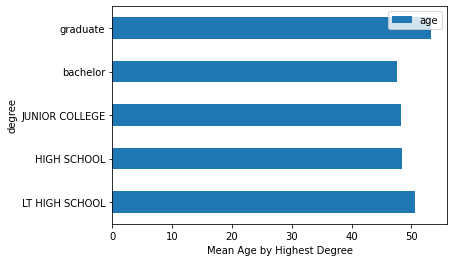

In [3]:

df = df.replace('89 OR OLDER', 89)
df['age'] = pd.to_numeric(df['age'])
print(df['age'].mean())

import matplotlib.pyplot as plt
df.groupby('degree')['age'].mean().plot(kind='barh')
plt.xlabel('Mean Age by Highest Degree')
plt.legend();

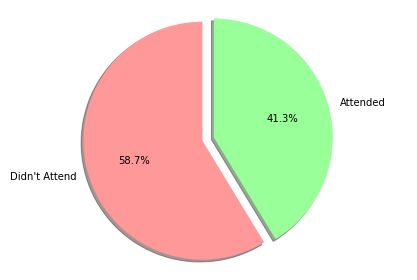

In [74]:
performance_counts = df['prfmnce'].value_counts()
labels=["Didn't Attend","Attended"]
colors=["#ff9999","#99ff99"]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(performance_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

## Use Groupby to Spot Additional Trends

In [95]:
exhibition_gender = df.groupby('artexbt')['sex'].value_counts()
exhibition_gender

artexbt  sex   
0        female    511
         male      471
1        female    253
         male      227
Name: sex, dtype: int64

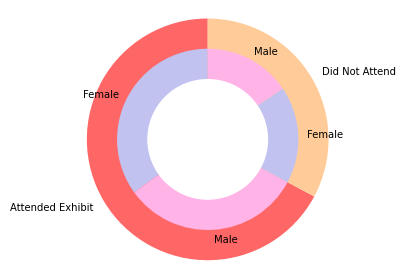

In [98]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Attended Exhibit','Did Not Attend']
exhibition_counts = df['artexbt'].value_counts()
labels_gender = ['Female','Male','Female','Male']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(exhibition_counts, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(exhibition_gender, labels=labels_gender, colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

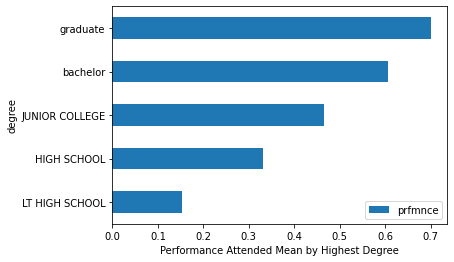

In [76]:
df['prfmnce'] = df['prfmnce'].replace(['No', 'Yes'], [0, 1])
df['artexbt'] = df['artexbt'].replace(['No', 'Yes'], [0, 1])
df.head()

df.groupby('degree')['prfmnce'].mean().plot(kind='barh')
plt.xlabel('Performance Attended Mean by Highest Degree')
plt.legend();

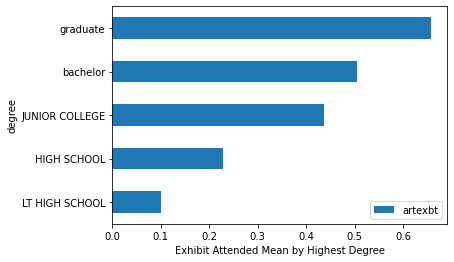

In [77]:
df.groupby('degree')['artexbt'].mean().plot(kind='barh')
plt.xlabel('Exhibit Attended Mean by Highest Degree')
plt.legend();